In [188]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
df = pd.read_csv('dataset.csv')
df.head()

,Participant code,Age (years),Gender,Positive history of Parkinson disease in family,Age of disease onset (years),Duration of disease from first symptoms (years),Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,Levodopa equivalent (mg/day),Clonazepam (mg/day),Overview of motor examination: Hoehn & Yahr scale (-),Overview of motor examination: UPDRS III total (-),18. Speech,19. Facial Expression,20. Tremor at Rest - head,20. Tremor at Rest - RUE,20. Tremor at Rest - LUE,20. Tremor at Rest - RLE,20. Tremor at Rest - LLE,21. Action or Postural Tremor - RUE,21. Action or Postural Tremor - LUE,22. Rigidity - neck,22. Rigidity - RUE,22. Rigidity - LUE,22. Rigidity - RLE,22. Rigidity - LLE,23.Finger Taps - RUE,23.Finger Taps - LUE,24. Hand Movements - RUE,24. Hand Movements - LUE,25. Rapid Alternating Movements - RUE,25. Rapid Alternating Movements - LUE,26. Leg Agility - RLE,26. Leg Agility - LLE,27. Arising from Chair,28. Posture,29. Gait,30. Postural Stability,31. Body Bradykinesia and Hypokinesia,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Latency of respiratory exchange (ms),Entropy of speech timing (-) .1,Rate of speech timing (-/min) .1,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
0,PD01,58,F,No,56,2,No,No,No,No,0,0.0,1.5,8,0,1,0,0,2,0,2,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1.564,354,6.05,146,264,58.65,31.38,-2.101,-22.47,4.5,21.14,167,1.564,333,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,PD02,68,F,No,67,1,No,No,No,No,0,0.0,2.5,22,1,1,0,0,0,0,0,1,1,1,0,1,1,2,1,2,0,1,1,2,1,2,0,1,0,1,1,1.564,340,27.52,173,253,48.26,22.38,-1.745,-24.59,7.0,15.28,163,1.569,285,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,PD03,68,M,No,67,1,No,No,No,No,0,0.0,2,19,0,2,0,0,0,0,0,0,0,2,0,0,2,2,1,1,0,1,0,0,1,2,0,3,0,0,2,1.550,211,11.97,377,322,47.54,38.12,2.657,-16.89,3.0,20.76,372,1.550,247,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,PD04,75,M,No,73,2,No,No,No,No,0,0.0,2,24,0,2,0,1,0,1,0,1,1,1,1,1,1,1,1,1,2,2,1,2,1,0,0,1,1,0,1,1.519,140,-2.49,360,663,13.72,44.88,-0.934,-25.54,1.0,18.71,119,1.539,112,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,PD05,61,M,Yes,60,0.7,No,No,No,No,0,0.0,2.5,54,1,3,3,2,1,1,0,1,2,3,3,3,1,1,3,4,2,4,2,3,1,3,1,2,1,1,2,1.543,269,6.72,211,328,42.90,47.12,-0.973,-22.61,5.0,16.26,78,1.560,230,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151


In [4]:
# only interested in these columns
df_cols = df[[' Participant  code ', ' Age  (years) ', 'Gender',
       ' Positive  history  of  Parkinson  disease  in  family ',' Entropy  of  speech  timing  (-) ',
       ' Rate  of  speech  timing  (-/min) ',
       ' Acceleration  of  speech  timing  (-/min2) ',
       ' Duration  of  pause  intervals  (ms) ',
       ' Duration  of  voiced  intervals  (ms) ',
       ' Gaping  in-between  voiced  intervals  (-/min) ',
       ' Duration  of  unvoiced  stops  (ms) ',
       ' Decay  of  unvoiced  fricatives  (‰/min) ',
       ' Relative  loudness  of  respiration  (dB) ',
       ' Pause  intervals  per  respiration  (-) ',
       ' Rate  of  speech  respiration  (-/min) ',
       ' Latency  of  respiratory  exchange  (ms) ',
       ' Entropy  of  speech  timing  (-) .1',
       ' Rate  of  speech  timing  (-/min) .1',
       ' Acceleration  of  speech  timing  (-/min2) .1',
       ' Duration  of  pause  intervals  (ms) .1',
       ' Duration  of  voiced  intervals  (ms) .1',
       ' Gaping  in-between  voiced  Intervals  (-/min) ',
       ' Duration  of  unvoiced  stops  (ms) .1',
       ' Decay  of  unvoiced  fricatives  (‰/min) .1',
       ' Relative  loudness  of  respiration  (dB) .1',
       ' Pause  intervals  per  respiration  (-) .1',
       ' Rate  of  speech  respiration  (-/min) .1',
       ' Latency  of  respiratory  exchange  (ms) .1']].copy()

In [5]:
df_cols.head()
df_cols[' Positive  history  of  Parkinson  disease  in  family '].unique() 
# notice we have some '-' values so investigate to see how many and what to do...

array(['No', 'Yes', '-'], dtype=object)

(array([77.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

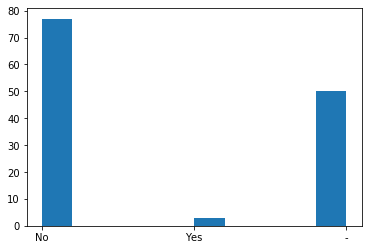

In [6]:
history = df_cols[' Positive  history  of  Parkinson  disease  in  family '].values
plt.hist(history) # there are only a few so just drop those rows.

In [7]:
#df_cols = df_cols[df_cols[' Positive  history  of  Parkinson  disease  in  family '] != '-']
df_cols[' Positive  history  of  Parkinson  disease  in  family '] = df_cols[' Positive  history  of  Parkinson  disease  in  family '].replace(['-'],'No')


In [8]:
# Binarize the gender and positive history columns
le = preprocessing.LabelEncoder()
le.fit(df_cols['Gender'].values)
df_cols['Gender'] = le.transform(df_cols['Gender'].values)

le.fit(df_cols[' Positive  history  of  Parkinson  disease  in  family '].values)
df_cols[' Positive  history  of  Parkinson  disease  in  family '] = le.transform(df_cols[' Positive  history  of  Parkinson  disease  in  family '].values)

# Gender: 0 = female, 1 = male
# Family History: 1 = no, 2 = Yes, 0 = '-'

In [9]:
def filter_participants(df_in, part_code):
    """
    To filter the dataframe into only PDxx (Parkinson's), HCxx (Healthy Control), RBDxx (REM Sleep Beh. Dis.) 
    
    df = all data df.
    part_code = first 2 letters of participant code (string)
    """
    df_out = df_in[df_in[' Participant  code '].str.startswith(part_code)].copy()
    return df_out

In [10]:
#df[' Participant  code '].unique()

In [11]:
df_park = filter_participants(df_cols, "PD")
df_park.drop([' Participant  code '], axis=1, inplace=True)
#df_park[' Participant  code '] = 'PD'
df_park.head()

,Age (years),Gender,Positive history of Parkinson disease in family,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Latency of respiratory exchange (ms),Entropy of speech timing (-) .1,Rate of speech timing (-/min) .1,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
0,58,0,0,1.564,354,6.05,146,264,58.65,31.38,-2.101,-22.47,4.5,21.14,167,1.564,333,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,68,0,0,1.564,340,27.52,173,253,48.26,22.38,-1.745,-24.59,7.0,15.28,163,1.569,285,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,68,1,0,1.550,211,11.97,377,322,47.54,38.12,2.657,-16.89,3.0,20.76,372,1.550,247,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,75,1,0,1.519,140,-2.49,360,663,13.72,44.88,-0.934,-25.54,1.0,18.71,119,1.539,112,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,61,1,1,1.543,269,6.72,211,328,42.90,47.12,-0.973,-22.61,5.0,16.26,78,1.560,230,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151


In [12]:
df_RBD = filter_participants(df_cols, "RBD")
df_RBD.drop([' Participant  code '], axis=1, inplace=True)
#df_RBD[' Participant  code '] = 'RBD'
df_RBD.head()

,Age (years),Gender,Positive history of Parkinson disease in family,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Latency of respiratory exchange (ms),Entropy of speech timing (-) .1,Rate of speech timing (-/min) .1,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
30,73,0,0,1.568,377,17.85,132,249,69.43,23.50,0.584,-18.17,5.50,22.66,84,1.575,340,3.62,140,308,67.80,22.38,0.238,-15.69,9.0,9.58,81
31,54,1,0,1.564,359,37.62,135,264,61.22,38.12,0.073,-24.73,7.50,15.16,117,1.568,286,-1.89,221,322,50.47,22.38,-0.449,-15.73,4.5,18.02,266
32,66,1,0,1.550,336,1.68,126,286,52.24,24.63,-2.129,-23.83,5.00,20.00,113,1.562,334,-4.89,221,239,55.20,22.38,0.445,-20.16,4.5,16.23,191
33,59,1,0,1.551,358,16.54,111,261,69.57,38.13,-0.893,-18.81,6.25,20.63,88,1.555,273,7.01,167,364,40.98,22.38,0.466,-17.91,4.0,17.52,58
34,75,1,0,1.563,278,9.32,227,294,56.14,35.87,-2.129,-26.61,3.75,21.34,167,1.559,298,7.15,179,299,53.20,31.37,-0.034,-19.99,4.0,20.96,97


In [13]:
df_control = filter_participants(df_cols, "HC")
#df_control[' Participant  code '] = 'HC'
df_control.drop([' Participant  code '], axis=1, inplace=True)
df_control.head()

,Age (years),Gender,Positive history of Parkinson disease in family,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Latency of respiratory exchange (ms),Entropy of speech timing (-) .1,Rate of speech timing (-/min) .1,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
80,73,1,0,1.546,249,25.80,185,366,43.86,34.75,-0.078,-26.25,4.50,22.24,118,1.539,241,3.69,269,381,27.91,29.13,0.335,-25.79,2.0,18.49,128
81,45,1,0,1.555,339,15.63,157,263,43.42,30.25,-0.761,-28.50,4.25,23.44,143,1.548,335,-0.12,215,274,31.49,22.38,0.338,-24.61,6.0,13.72,260
82,77,1,0,1.524,319,12.82,149,290,34.35,49.38,2.341,-22.96,4.00,15.56,117,1.558,342,-1.28,199,242,72.96,17.88,0.135,-18.61,3.0,24.95,150
83,61,1,0,1.546,392,-9.40,109,245,43.72,22.38,-4.831,-18.25,8.00,9.94,57,1.542,347,11.65,226,258,32.87,22.38,-0.448,-23.69,3.0,18.23,116
84,56,1,0,1.558,417,40.07,117,229,59.33,28.00,-0.302,-16.28,10.00,8.87,138,1.557,294,-6.10,219,305,35.46,31.37,-0.406,-12.46,5.0,13.89,58


In [14]:
scaler = preprocessing.StandardScaler()

In [15]:
df_park_scl = pd.DataFrame(scaler.fit_transform(df_park.values), columns = df_park.columns)
df_RBD_scl =  pd.DataFrame(scaler.fit_transform(df_RBD.values), columns = df_RBD.columns)
df_control_scl =  pd.DataFrame(scaler.fit_transform(df_control.values), columns = df_control.columns)


In [16]:
df_park_scl['label'] = 'PD' #PD
df_RBD_scl['label'] = 'RBD' # RBD
df_control_scl['label'] = 'HC' # HC

In [17]:
final_df = pd.concat([df_park_scl, df_RBD_scl, df_control_scl])

In [18]:
final_df.head() # finally! :D

,Age (years),Gender,Positive history of Parkinson disease in family,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Latency of respiratory exchange (ms),Entropy of speech timing (-) .1,Rate of speech timing (-/min) .1,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1,label
0,-0.645988,-1.527525,-0.267261,0.552559,0.906219,-0.387128,-0.693186,-0.516452,0.524162,-0.027823,-0.267976,0.006927,-0.287810,0.746045,0.412308,0.550717,1.088946,-0.906336,-1.053343,-0.182377,0.338858,-0.792460,0.738147,0.340101,0.811225,-1.013699,-0.382406,PD
1,0.285725,-1.527525,-0.267261,0.552559,0.629812,1.766147,-0.226064,-0.662995,-0.204113,-1.164301,-0.106035,-0.752607,0.567071,-0.591449,0.350307,0.862443,0.227362,0.970251,0.296591,-0.695313,-0.306768,-0.251328,-1.453341,-0.871899,-0.133891,0.973261,1.452352,PD
2,0.285725,0.654654,-0.267261,-0.069625,-1.917078,0.206602,3.303301,0.256228,-0.254581,0.823273,1.896393,2.006075,-0.800739,0.659313,3.589868,-0.322117,-0.454725,0.375942,0.148788,-0.191876,0.335802,-0.792460,-1.654964,2.590463,-0.133891,1.160475,0.347552,PD
3,0.937924,0.654654,-0.267261,-1.447318,-3.318854,-1.243624,3.009187,4.799055,-2.625156,1.676895,0.262881,-1.092963,-1.484644,0.191418,-0.331706,-1.007915,-2.877929,-1.974048,1.301652,4.396052,-1.977756,2.447132,1.052989,-1.503946,-1.079008,-0.873913,-0.145663,PD
4,-0.366474,0.654654,3.741657,-0.380717,-0.771964,-0.319932,0.431367,0.336160,-0.579817,1.959752,0.245140,-0.043231,-0.116834,-0.367773,-0.967218,0.301336,-0.759869,1.578183,-0.580373,1.356431,-0.843134,-0.252528,-0.057488,-0.545458,0.338667,-0.814005,-0.145663,PD


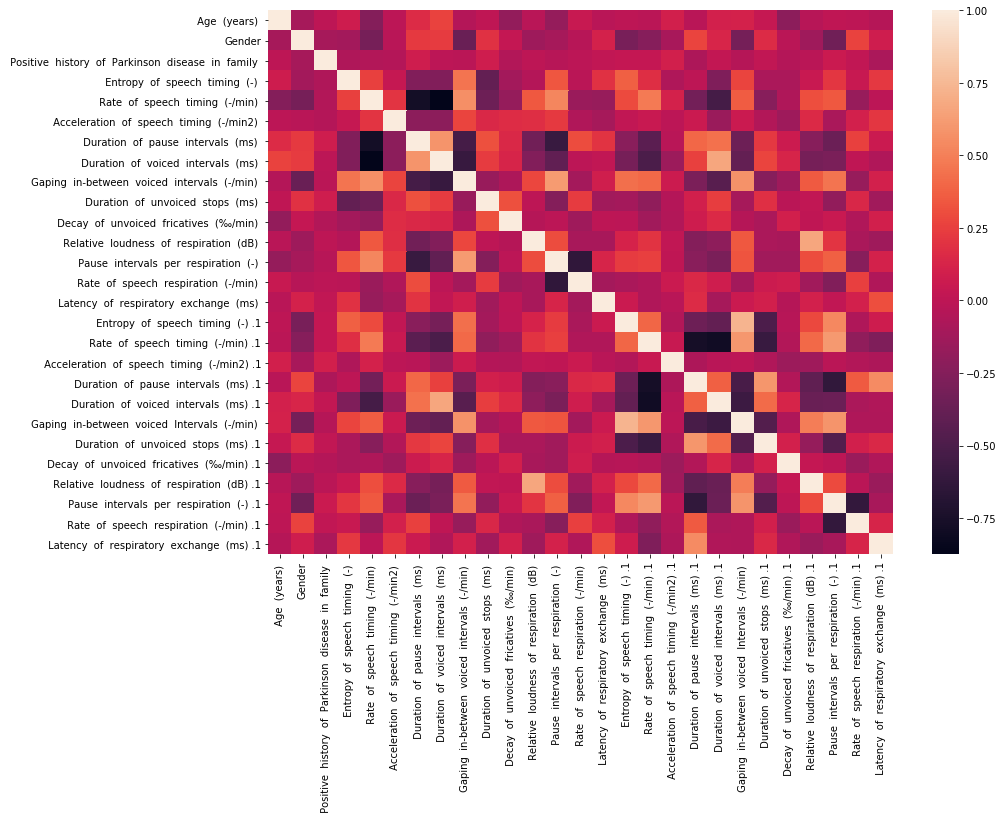

In [19]:
plt.figure(figsize=(14, 10))

corr_mat = sns.heatmap(final_df.corr())

(array([0.26249174, 0.09305137, 0.07062784, 0.06909127, 0.06436673,
       0.05274701, 0.04943497, 0.04561619, 0.03797767, 0.02914056,
       0.02830414, 0.02705305, 0.02535038, 0.02369855, 0.02126091]), array([0.26249174, 0.35554311, 0.42617095, 0.49526222, 0.55962895,
       0.61237596, 0.66181092, 0.70742712, 0.74540478, 0.77454534,
       0.80284949, 0.82990253, 0.85525292, 0.87895147, 0.90021238]))


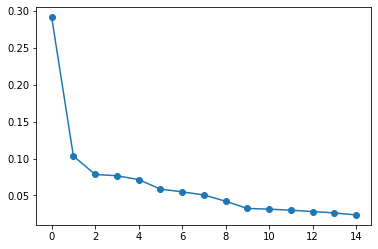

In [20]:
# Find optimal # of components

def scree_plot(data, max_comps):
    pca = PCA(n_components = max_comps)
    pca.fit(data)
    exp_var = pca.explained_variance_ratio_
    
    fig = plt.figure()
    plt.plot([exp_var[i]/sum(exp_var) for i in range(0, len(exp_var))], marker='o')
    return exp_var, (np.cumsum(exp_var))
    
print(scree_plot(final_df.iloc[:,:-1], 15))



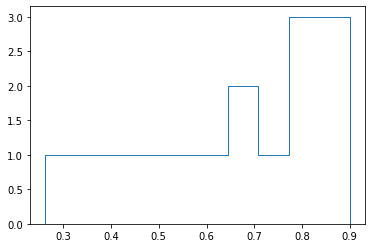

In [21]:
#for fun also plot the cumulative variance explained by all the components
def cum_var_exp(data, max_comps):
    pca = PCA(n_components = max_comps)
    pca.fit(data)
    exp_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(exp_var)
    plt.hist(cum_var_exp, histtype='step')

cum_var_exp(final_df.iloc[:,:-1], 15)

In [22]:
# Looks like 3 PC's would be good... let's do it! 

PCA2 = PCA(n_components = 3)
pca_df = pd.DataFrame(PCA2.fit_transform(final_df.iloc[:,:-1]), columns = ['PC1', 'PC2', 'PC3'])

In [23]:
pca_df['label'] = final_df['label'].values

In [24]:
pca_df

,PC1,PC2,PC3,label
0,-2.306390,-1.090378,-0.275236,PD
1,-1.053076,2.243836,-1.118036,PD
2,1.351774,-0.225142,-2.087045,PD
3,9.261736,-2.362060,0.742966,PD
4,1.470323,-1.649027,1.075302,PD
...,...,...,...,...
125,3.745607,0.442408,-0.769582,HC
126,1.644112,-1.347414,-0.899754,HC
127,3.821954,0.256312,1.235623,HC
128,0.966337,1.543220,0.070279,HC


In [123]:
pca_df['label'].unique()

array(['PD', 'RBD', 'HC'], dtype=object)

(130, 4)

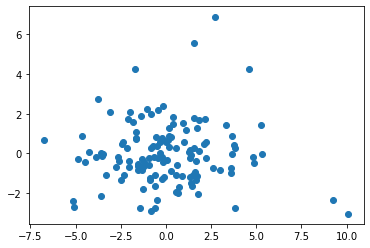

In [196]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])
pca_df.shape

[(0.8143944636678201, 0.8189926951172626, 0.9016224529027297), (0.4009073433294887, 0.6612072279892349, 0.8108419838523645), (0.007750865051903114, 0.5039446366782007, 0.5366551326412917)]


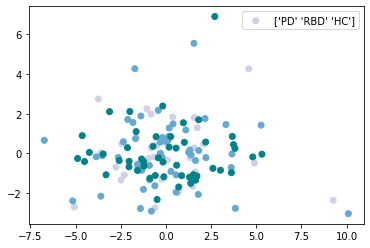

In [156]:
color_labels = pca_df['label'].unique()

# List of RGB triplets
rgb_values = sns.color_palette("PuBuGn", len(color_labels))
print(rgb_values)



# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

# Finally use the mapped values
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['label'].map(color_map), label=pca_df['label'].unique())
plt.legend()

[[0.096379, 0.025165, 0.547103], [0.67916, 0.151848, 0.575189], [0.951726, 0.941671, 0.152925]]


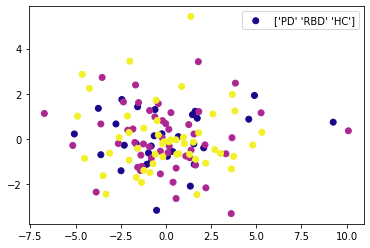

In [184]:
cmap = plt.get_cmap('plasma')
rgb_cm = cmap.colors
len(rgb_cm)
color_labels = pca_df['label'].unique()

# List of RGB triplets
rgb_values = [rgb_cm[4], rgb_cm[99], rgb_cm[250]]
print(rgb_values)



# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

# Finally use the mapped values
plt.scatter(pca_df['PC1'], pca_df['PC3'], c=pca_df['label'].map(color_map), label=pca_df['label'].unique())
plt.legend()

In [185]:
# It's possible that the data is nonlinearly separable. Lets see if t-SNE fares any better

In [210]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(final_df.iloc[:,:-1].values)

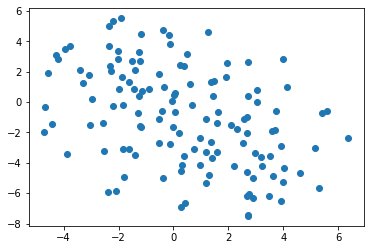

In [234]:



X_tsne=pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])

plt.scatter(X_tsne['tsne1'], X_tsne['tsne2'])
plt.show()